In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, Bidirectional, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import yfinance as yf

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = yf.download("AAPL", start = "2020-01-01", end = "2022-01-01")

C:\Users\admin\AppData\Local\Temp\ipykernel_25424\1842662040.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download("AAPL", start = "2020-01-01", end = "2022-01-01")
[*********************100%***********************]  1 of 1 completed


In [3]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2020-01-02,72.538506,72.598884,71.292296,71.545882,135480400
2020-01-03,71.833298,72.594063,71.608692,71.765674,146322800
2020-01-06,72.405678,72.444321,70.703012,70.954188,118387200
2020-01-07,72.065132,72.671325,71.845354,72.415322,108872000
2020-01-08,73.224419,73.526310,71.768094,71.768094,132079200


In [4]:
data = df[["Close"]].values

In [5]:
data[:10]

array([[72.53850555],
       [71.83329773],
       [72.4056778 ],
       [72.06513214],
       [73.22441864],
       [74.77976227],
       [74.94880676],
       [76.5500412 ],
       [75.51637268],
       [75.19273376]])

In [6]:
scaler = MinMaxScaler()

scaled_data = scaler.fit_transform(data)

In [7]:
X, y = [], []
time_step = 60

for i in range(time_step, len(scaled_data)): # (60, 505)
    X.append(scaled_data[i-time_step:i, 0])
    y.append(scaled_data[i, 0])
    
X, y = np.array(X), np.array(y)
X = np.reshape(X, (X.shape[0], X.shape[1], 1)) # (samples, time_steps, features) 

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [9]:
model = Sequential([
	LSTM(100, return_sequences=True, input_shape = (X.shape[1], 1)),
	Dropout(0.2),
	LSTM(100),
	Dropout(0.2),
	Dense(1, activation = "linear")
])

c:\ProgramData\anaconda3\envs\tf\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [10]:
model.compile(loss = "mean_squared_error", optimizer = "adam")

In [11]:
history = model.fit(X_train, y_train, epochs = 30, batch_size = 32, validation_data=(X_test, y_test))

Epoch 1/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - loss: 0.0959 - val_loss: 0.0194
Epoch 2/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0111 - val_loss: 0.0056
Epoch 3/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0061 - val_loss: 0.0029
Epoch 4/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0045 - val_loss: 0.0037
Epoch 5/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0044 - val_loss: 0.0020
Epoch 6/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0037 - val_loss: 0.0018
Epoch 7/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0037 - val_loss: 0.0016
Epoch 8/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0033 - val_loss: 0.0017
Epoch 9/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0033 - val_loss: 0.0016
Epoch 10/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0031 - val_loss: 0.0018
Epoch 11/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0030 - val_loss: 0.0017
Epoch 12/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0

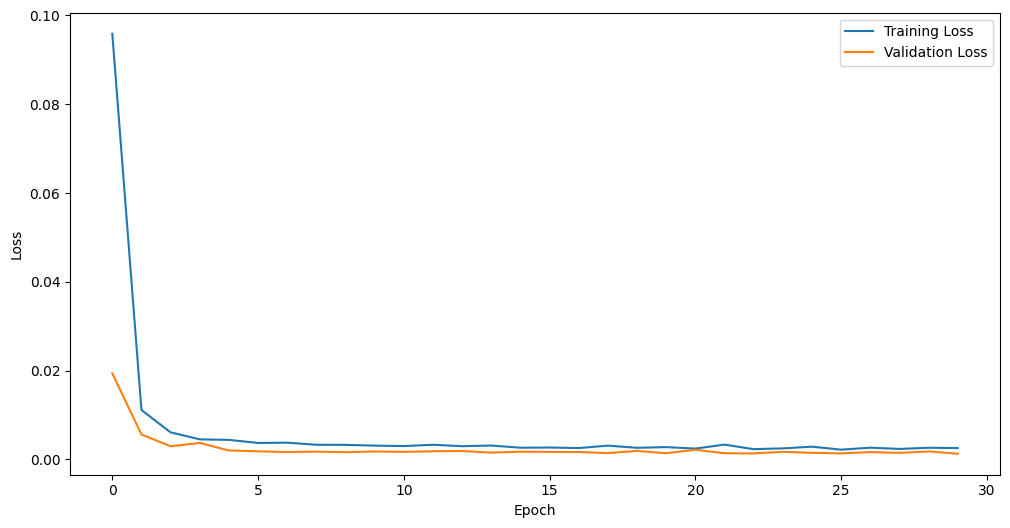

In [12]:
plt.figure(figsize=(12, 6))	
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [13]:
pred = model.predict(X_test)
pred = scaler.inverse_transform(pred)
actual = scaler.inverse_transform(y_test.reshape(-1, 1))

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


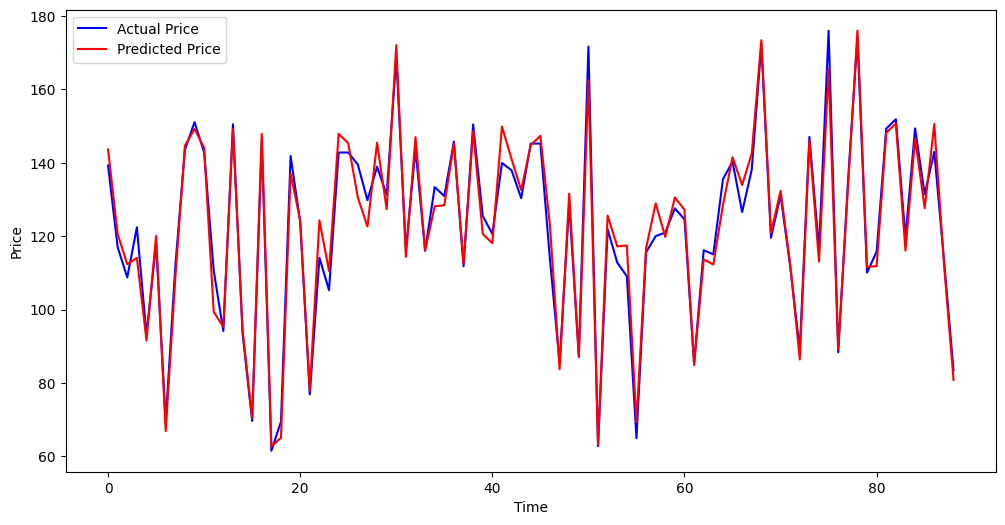

In [14]:
plt.figure(figsize=(12, 6))
plt.plot(actual, color='blue', label='Actual Price')
plt.plot(pred, color='red', label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()